In [ ]:
import cv2
gray = cv2.imread('car.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
gray.shape

(3405, 2724)

In [ ]:
import numpy as np

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [ ]:
g=gaussian_kernel(size=5, sigma=1)

In [ ]:
def convolution(oldimage, kernel):
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]


    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]

    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)


    h = kernel_h // 2
    w = kernel_w // 2

    image_conv = np.zeros(image_pad.shape)

    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w

    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]
    return (image_conv[h:h_end,w:w_end])

In [ ]:
noise_removed_img=convolution(gray, g)

In [ ]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return (G, theta)

In [ ]:
G, t= sobel_filters(noise_removed_img)

<ipython-input-31-c7fca6ccf5c9>:7: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ix = ndimage.filters.convolve(img, Kx)
<ipython-input-31-c7fca6ccf5c9>:8: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iy = ndimage.filters.convolve(img, Ky)


In [ ]:
G

array([[ 65.57509788,  87.69775771,  68.84081084, ...,  68.13452749,
         86.95743713,  65.37742469],
       [ 87.68388478, 114.90064082,  98.19933754, ...,  97.03923117,
        113.75295381,  87.20331564],
       [ 68.79867622,  98.16460271,  53.46953902, ...,  51.78737547,
         96.62411385,  68.09103952],
       ...,
       [ 41.31155583,  57.46431147,  31.79333492, ...,   6.90559768,
         13.22833878,   9.14137644],
       [ 52.65592317,  67.8261752 ,  58.52423603, ...,  13.14308396,
         15.55455322,  11.78750428],
       [ 38.55141748,  50.71702583,  39.93735505, ...,   9.43199914,
         12.09345706,   9.01452333]])

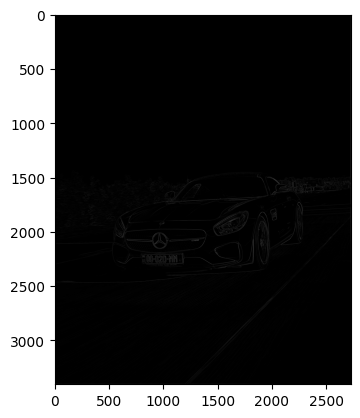

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(edge_detection_imag, cmap='gray')

In [ ]:
#non max supression

In [ ]:
t

array([[ 2.35621516,  2.45748012,  1.98489807, ...,  1.16959278,
         0.68870465,  0.78758056],
       [ 2.2550191 ,  2.35631791,  1.91555869, ...,  1.23518113,
         0.78840055,  0.88739622],
       [ 2.72824117,  2.79777481,  2.3577876 , ...,  0.78890789,
         0.34073793,  0.40844146],
       ...,
       [-2.66883228, -2.74194797, -2.22493051, ..., -0.67422922,
        -0.28231182, -0.33993098],
       [-2.22572257, -2.31970125, -1.86318961, ..., -1.20710999,
        -0.76200575, -0.86380129],
       [-2.33422388, -2.42954195, -1.93009341, ..., -1.14722493,
        -0.67359774, -0.77461943]])

In [ ]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi

    angle[angle < 0] += 180


    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255

               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass

    return Z

In [ ]:
non_max_img= non_max_suppression(G, t)

In [ ]:
#double threshold to identify strong, weak, non relevant pixels

In [ ]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):

    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;

    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)

    weak = np.int32(25)
    strong = np.int32(255)

    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)

    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return (res, weak, strong)

In [ ]:
res, weak, strong= threshold(non_max_img, lowThresholdRatio=0.05, highThresholdRatio=0.09)

In [ ]:
#Edge tracking by Hysterisis
#convert weak into strong

In [ ]:
def hysteresis(img, weak, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i,j] == weak):
                try:
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass
    return img

In [ ]:
edge_detection_imag=hysteresis(non_max_img, weak, strong=255)

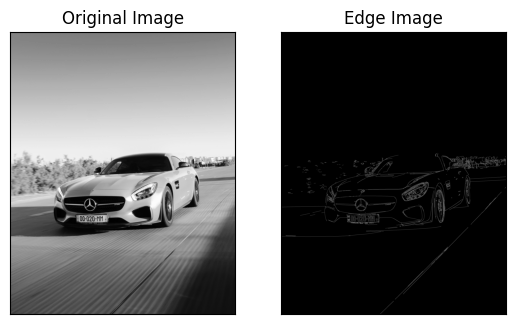

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('car.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()